<a href="https://colab.research.google.com/github/StrikingHour/Learn-PyTorch/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn

torch.__version__


'2.6.0+cu124'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim = 1)

weight = 0.7
bias = 0.3

y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, predictions = None):

  plt.figure(figsize = (10, 7))

  plt.scatter(X_train, y_train, c = 'b', s = 4, label = "Training Data")
  plt.scatter(X_test, y_test, c = 'g', s = 4, label = "Testing Data")

  if predictions is not None:
    plt.scatter(X_test, predictions, c = 'r', s = 4, label = "Predictions")

  plt.legend(prop = {"size":14})


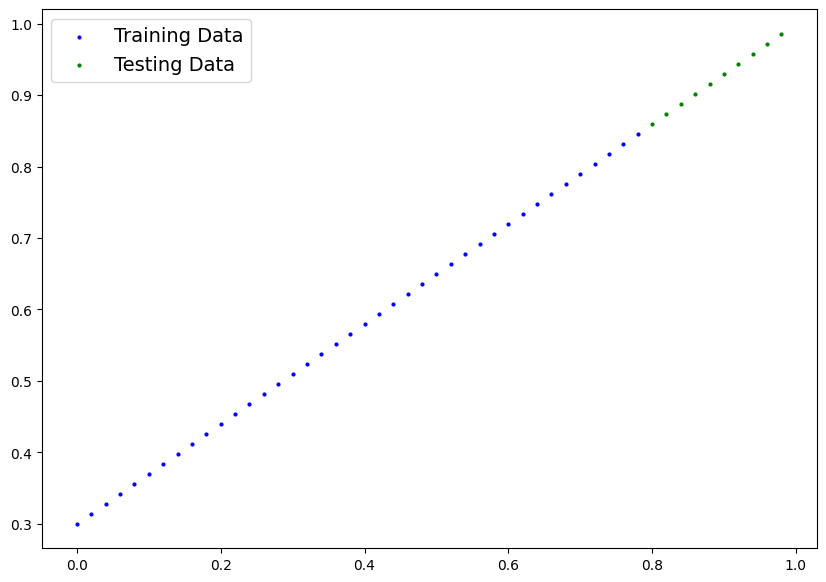

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features= 1, out_features=1)

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0.state_dict()
model_0.to(device)
next(model_0.parameters()).device


device(type='cpu')

In [10]:
with torch.inference_mode():

  y_preds = model_0(X_test)



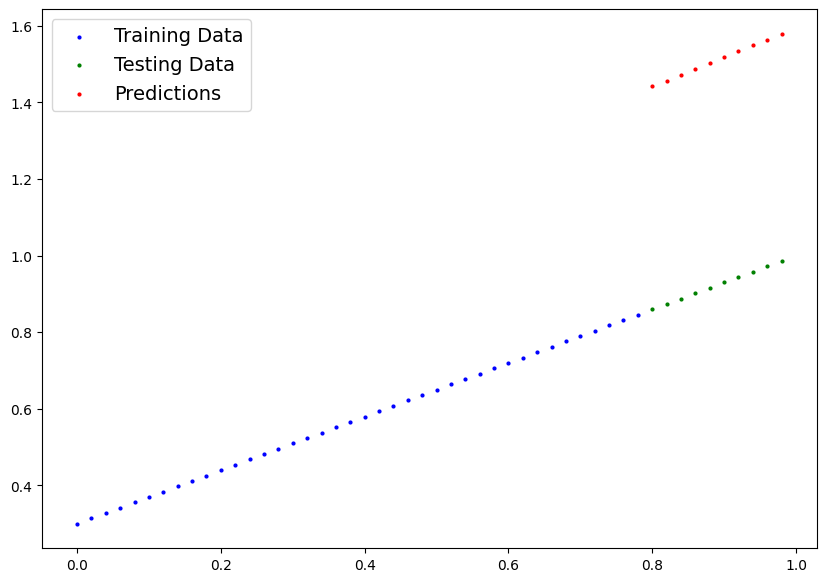

In [11]:
plot_predictions(predictions = y_preds)

In [12]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [13]:
torch.manual_seed(42)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


epochs = 1000

for epoch in range(epochs):

  # Training
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [16]:
from pprint import pprint
pprint(model_0.state_dict())
print(f"weights: {weight}, bias: {bias}")

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])
weights: 0.7, bias: 0.3


In [17]:
with torch.inference_mode():
  y_preds = model_0(X_test)


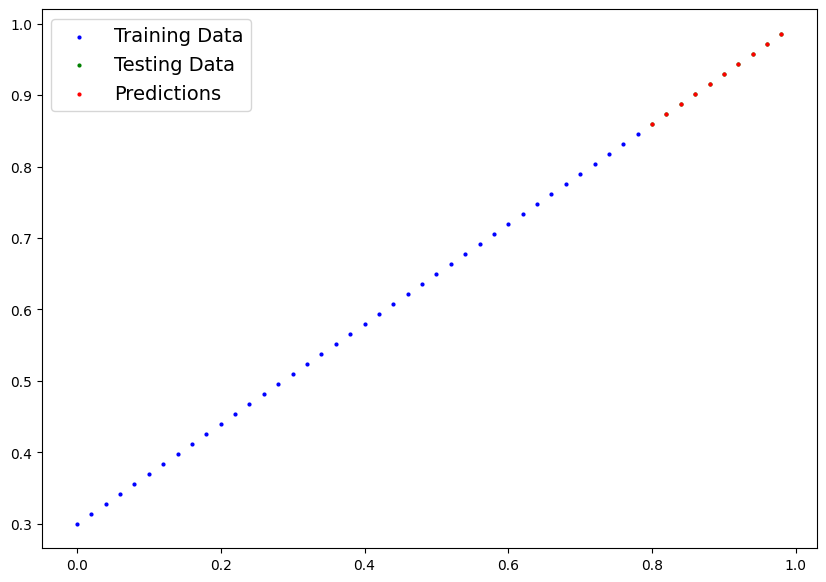

In [18]:
plot_predictions(predictions = y_preds)

# Saving and loading a model

In [22]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [24]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])